In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [497]:
data = pd.read_csv("HouseData.csv")
# col = "price area bedrooms bathrooms stories".split()
# data = data[col]

# # sns.pairplot(data)
data


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,0
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,2


In [498]:
missing_values = data.isna().sum() + data.isnull().sum()

print("Missing values per column:")
print(missing_values)

Missing values per column:
price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


# New Section

In [533]:
from sklearn.model_selection import train_test_split

# Assuming 'data' is your DataFrame
X = data.drop("price", axis=1)  # Features (all columns except 'price')
y = data["price"]  # Target variable ('price')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)



In [534]:
meu = np.mean(X_train["area"])
sigma = np.std(X_train["area"])

X_train["area"] = (X_train["area"] - meu) / sigma


X_test["area"] = (X_test["area"] - meu) / sigma




In [535]:
# Calculate Q1 and Q3
Q1 = X_train['area'].quantile(0.1)
Q3 = X_train['area'].quantile(0.9)

# Calculate IQR
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
X_train = X_train[(X_train['area'] >= lower_bound) & (X_train['area'] <= upper_bound)]
X_test = X_test[(X_test['area'] >= lower_bound) & (X_test['area'] <= upper_bound)]
y_train = y_train.loc[X_train.index]
y_test = y_test.loc[X_test.index]

# Optionally, you can reset the index of the filtered DataFrames
X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)



<Axes: xlabel='area', ylabel='bedrooms'>

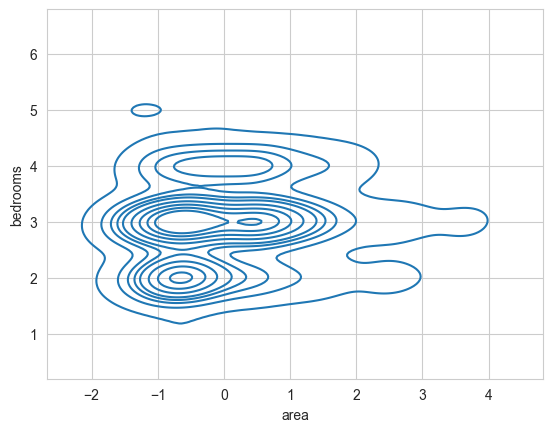

In [536]:
sns.kdeplot(x=X_train["area"], y=X_train["bedrooms"])

<Axes: ylabel='area'>

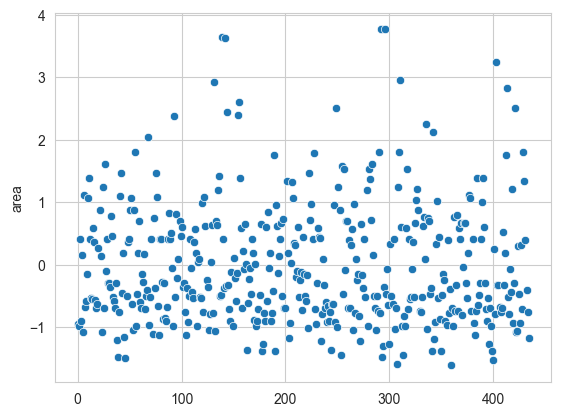

In [537]:
sns.scatterplot(X_train["area"])

In [538]:
def function(w,b,x):
    p = np.dot(w,x)+b
    return p

In [539]:
n = X_train.shape[1]


w = np.array([0.0, 0.0, 0.0, 0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0])
b = 0.0

print("w:", w)
print("b:", b)



w: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
b: 0.0


In [540]:
function(w,b,X_train.iloc[0])

0.0

In [541]:

def cost(w, b, x, y):
    m = x.shape[0]
    f_wb = np.dot(x, w) + b 
    mcost = np.sum((f_wb - y) ** 2) 
    total_cost = mcost / (2 * m)
    return total_cost


In [542]:
cost(w,b,X_train,y_train)

12992945200262.758

In [543]:
def derivative(w, b, x, y):
    m, n = x.shape
    f_wb = np.dot(x, w) + b
    error = f_wb - y
    
    dj_dw = np.dot(x.T, error) / m
    dj_db = np.sum(error) / m

    return dj_dw, dj_db


In [544]:
def gd(w, b, x, y, alpha=0.01, num_iter=100):
    m = x.shape[0]
    for i in range(num_iter):
        dj_dw, dj_db = derivative(w, b, x, y)
        w -= alpha * dj_dw
        b -= alpha * dj_db
    return w, b

In [ ]:
# w,b = gd(w,b,X_train,alpha = 0.00001,num_iter = 1000)

In [ ]:
# before gd                           : 12617396203243.807
# 1. alpha = 0.00001,num_iter = 1000  :  1486185043989.0344
# 2. alpha = 0.00001,num_iter = 1000  :  1297705255630.5657
# 3. alpha = 0.00001,num_iter = 1000  :  1156965486471.085
# 4. alpha = 0.00001,num_iter = 1000  :  1080308529393.5585

In [545]:
print("w:", w)
print("b:", b)

w: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
b: 0.0


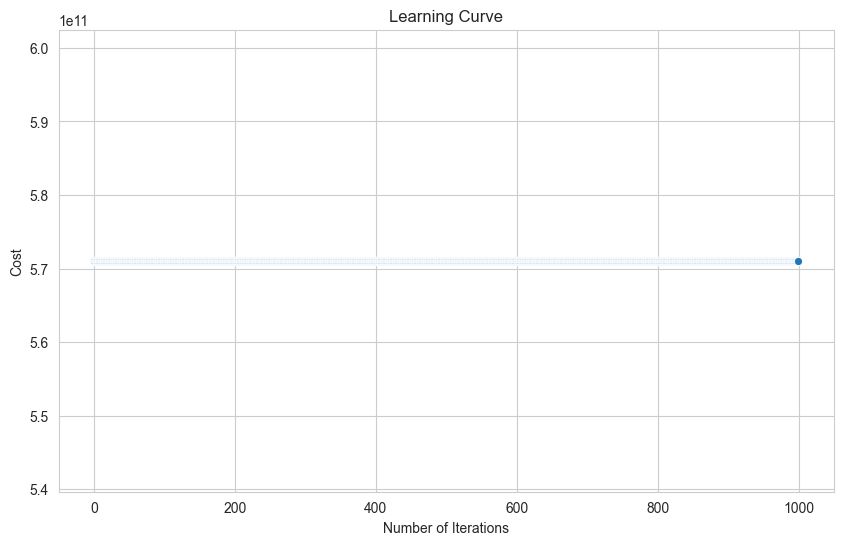

In [551]:
costValues = []
iters = []
learning_rate = 0.1

for i in range(0, 1000, 1):
    iters.append(i)
    w, b = gd(w, b, X_train,y_train, alpha=learning_rate, num_iter=1)
    costValues.append(cost(w, b, X_train, y_train))

# Plotting the learning curve using Seaborn
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.lineplot(x=iters, y=costValues, marker='o', linestyle='-')
plt.title('Learning Curve')
plt.xlabel('Number of Iterations')
plt.ylabel('Cost')
plt.show()

In [552]:
print("w:", w)
print("b:", b)

w: [496544.280248    33888.58290731 987682.36896872 470794.30668835
 324713.50251509 268504.8947432  371965.47918108 814063.85674071
 911125.35240433 297446.51592329 780539.68646462 209790.50534944]
b: 1138285.025875238


In [ ]:
w: [556362.85166496 250401.3891707  988712.41170721 439259.05903556
 506434.29024463 248334.71370548 407337.89560898 216197.18866988
 612038.20828205 253192.12870746 531637.66489128 257562.70355038]
b: 559204.1403147139

In [558]:
y_pred = []
m = y_test.shape[0]
for i in range(m):
  y_pred.append(function(w,b,X_test.iloc[i]))

In [559]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
r2_score(y_test,y_pred)


1030303067744.0303

In [555]:
y_pred = []
m = y_train.shape[0]
for i in range(m):
  y_pred.append(function(w,b,X_train.iloc[i]))
r2_score(y_train,y_pred)

0.6802857795183963

In [566]:
function(w,b,X_train.iloc[5])

4395974.339327373

In [567]:
y_train[5]

2380000

In [568]:
4395974.339327373-2380000

2015974.3393273726

In [523]:
def cost(w, b, x, y, l=100):
    m = len(y)
    y_pred = np.dot(x, w) + b
    error = y_pred - y
    cost = (1 / (2 * m)) * np.sum(error**2) + (l / (2 * m)) * np.sum(w**2)
    return cost

def derivative(w, b, x, y, l=100):
    m = len(y)
    y_pred = np.dot(x, w) + b
    error = y_pred - y
    dw = (1 / m) * np.dot(x.T, error) + (l / m) * w
    db = (1 / m) * np.sum(error)
    return dw, db

def reg_gd(w, b, x, y, alpha=0.01, num_iter=100, l=100):
    m = len(y)
    for i in range(num_iter):
        dw, db = derivative(w, b, x, y, l)
        w -= alpha * dw
        b -= alpha * db
    return w, b

In [440]:
dj_dw, dj_db = derivative(w, b, X_train, y_train)
print(dj_dw, dj_db)

[-4.80321884e-10 -1.53394306e-11  8.76538894e-12 -1.40246223e-10
  2.62961668e-10  1.53394306e-11 -1.07376014e-10 -5.41262767e-10
 -3.87868460e-10 -3.72529030e-11 -4.57991572e-10 -9.86106255e-11] -1.0781428393195658e-09


In [411]:
def cost(w, b, x, y, l=100):
    m = len(y)
    y_pred = np.dot(x, w) + b
    error = y_pred - y
    cost = (1 / (2 * m)) * np.sum(error**2) + (l / (2 * m)) * np.sum(w**2)
    return cost

def derivative(w, b, x, y, l=100):
    m = len(y)
    y_pred = np.dot(x, w) + b
    error = y_pred - y
    dw = (1 / m) * np.dot(x.T, error) + (l / m) * w
    db = (1 / m) * np.sum(error)
    return dw, db

def reg_gd(w, b, x, y, alpha=0.01, num_iter=100, l=36):
    m = len(y)
    for i in range(num_iter):
        dw, db = derivative(w, b, x, y, l)
        w -= alpha * dw
        b -= alpha * db
    return w, b


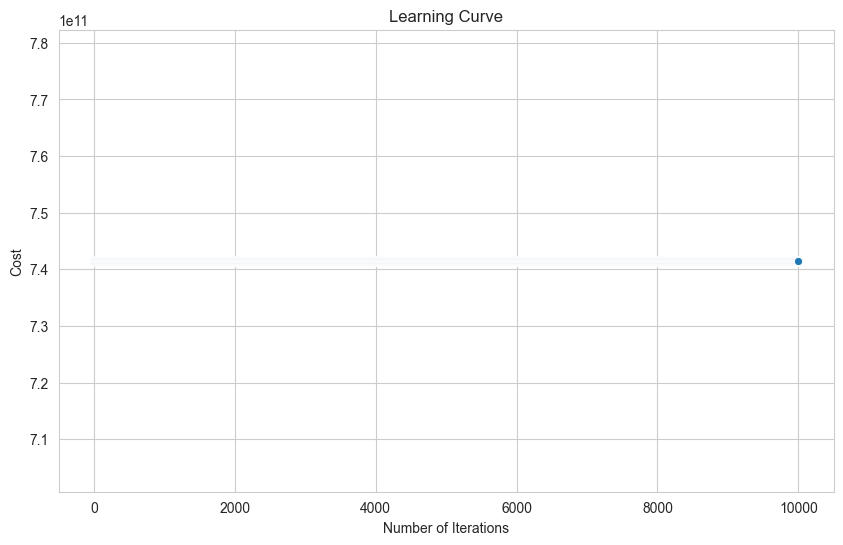

In [422]:
costValues = []
iters = []
learning_rate = 0.01

for i in range(0, 10000, 1):
    iters.append(i)
    w, b = reg_gd(w, b, X_train,y_train, alpha=learning_rate, num_iter=1)
    costValues.append(cost(w, b, X_train, y_train))

# Plotting the learning curve using Seaborn
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.lineplot(x=iters, y=costValues, marker='o', linestyle='-')
plt.title('Learning Curve')
plt.xlabel('Number of Iterations')
plt.ylabel('Cost')
plt.show()

In [423]:
y_pred = []
m = y_test.shape[0]
for i in range(m):
  y_pred.append(function(w,b,X_test.iloc[i]))

In [424]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.6188434533193787